Chapter 16

# 标准误
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码演示了样本均值的分布收敛性及其标准误差（SE），结合了混合正态分布的随机抽样和中心极限定理（CLT）。

1. **生成混合正态分布的总体**：
   - 创建一个总体样本 $X$，它是由两个正态分布组成的混合分布。第一个正态分布 $X_1 \sim N(-5, 1)$ 的样本数量为 $50,000$，第二个正态分布 $X_2 \sim N(5, 3)$ 的样本数量也为 $50,000$。总体样本数量为 $100,000$。
   - 绘制 $X$ 的概率密度函数，并标注均值 $\mu_X$ 及 $\pm \sigma_X$ 范围内的标准差。

2. **样本均值分布的模拟**：
   - 从总体 $X$ 中抽取样本，样本量为 $10$，进行 $5,000$ 次实验，并计算每次实验的样本均值。将这些均值存储在 `mean_array` 中。
   - 绘制样本均值在 $50$ 次、$500$ 次和 $5,000$ 次实验中的分布直方图，以观察分布如何随着实验次数趋于稳定。同时，标出样本均值的均值和 $\pm \sigma_{\bar{X}}$ 范围内的标准差，直观展示分布的收敛性。

3. **不同样本量下均值分布的密度估计**：
   - 在 $5,000$ 次实验中，分别以不同的样本量 $n = 4, 8, 16$ 从总体 $X$ 中抽样，计算均值并绘制密度图。随着样本量增加，样本均值的分布逐渐收敛并趋向于正态分布，符合中心极限定理。

4. **计算标准误差（SE）**：
   - 设定不同的样本量 $n$，在 $5,000$ 次实验中抽样计算均值，并记录每个样本量下的样本均值标准差，即标准误差 $\text{SE}_{\bar{X}} = \frac{\sigma_X}{\sqrt{n}}$。
   - 绘制样本量与标准误差的关系曲线，以显示 $\text{SE}_{\bar{X}}$ 随样本量增加而减小的趋势，符合标准误差的公式：$$\text{SE} = \frac{\sigma}{\sqrt{n}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 创建总体数据分布

In [2]:
num_population = 100000  # 总体数量
X1 = np.random.normal(loc=-5, scale=1.0, size=int(num_population/2))  # 第一部分的正态分布
X2 = np.random.normal(loc=5, scale=3, size=int(num_population/2))  # 第二部分的正态分布

X = np.concatenate((X1, X2), axis=None)  # 合并两部分数据为总体数据

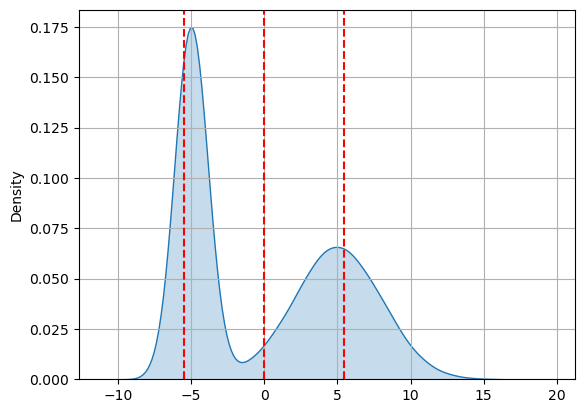

In [3]:
fig, ax = plt.subplots()  # 创建绘图

sns.kdeplot(X, fill=True)  # 绘制总体数据的核密度估计图

mu_X = X.mean()  # 计算总体数据的均值

ax.axvline(x=mu_X, color='r', linestyle='--')  # 绘制均值的垂直线

sigma_X = X.std()  # 计算总体数据的标准差

ax.axvline(x=mu_X + sigma_X, color='r', linestyle='--')  # 绘制均值加标准差的垂直线
ax.axvline(x=mu_X - sigma_X, color='r', linestyle='--')  # 绘制均值减标准差的垂直线

plt.grid()  # 显示网格

## 采样试验与均值分布绘制

In [4]:
num_draws = 10  # 每次实验的抽样数
num_trials = 5000  # 总试验次数

mean_array = []  # 存储每次试验的均值

for i in np.arange(num_trials):  # 进行每次试验
    indice_i = np.random.randint(low=0, high=num_population, size=(num_draws))  # 随机抽取样本索引
    sample_i = X[indice_i]  # 抽取样本数据
    mean_i = sample_i.mean()  # 计算样本均值
    mean_array.append(mean_i)  # 将样本均值加入列表

## 绘制不同试验次数下均值的直方图

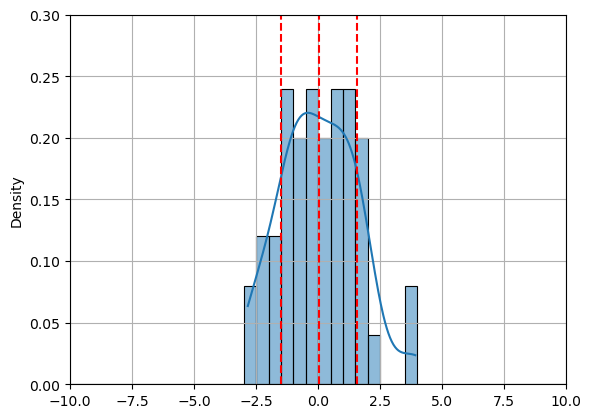

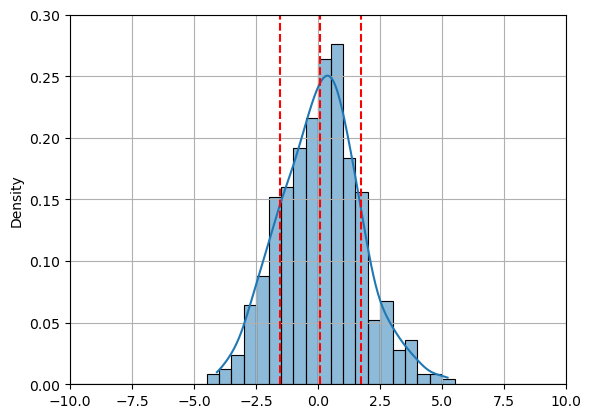

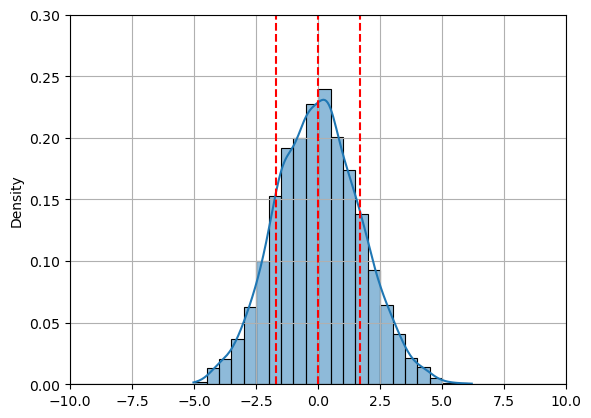

In [5]:
for j in [50, 500, 5000]:  # 不同试验次数
    mean_array_j = mean_array[0:j]  # 取出前j次试验的均值数据
    
    fig, ax = plt.subplots()  # 创建绘图
    
    sns.histplot(mean_array_j, kde=True, stat="density",  # 绘制直方图
                 binrange=[-10, 10], binwidth=0.5)
    
    mean_array_j = np.array(mean_array_j)  # 转换为数组形式便于计算均值和标准差
    
    mu_mean_array_j = mean_array_j.mean()  # 计算均值
    
    ax.axvline(x=mu_mean_array_j, color='r', linestyle='--')  # 绘制均值的垂直线
    
    sigma_mean_array_j = mean_array_j.std()  # 计算标准差
    
    ax.axvline(x=mu_mean_array_j + sigma_mean_array_j, color='r', linestyle='--')  # 绘制均值加标准差的垂直线
    ax.axvline(x=mu_mean_array_j - sigma_mean_array_j, color='r', linestyle='--')  # 绘制均值减标准差的垂直线
    
    plt.xlim(-10, 10)  # 设置x轴范围
    plt.ylim(0, 0.3)  # 设置y轴范围
    plt.grid()  # 显示网格

## 绘制均值的均值的分布

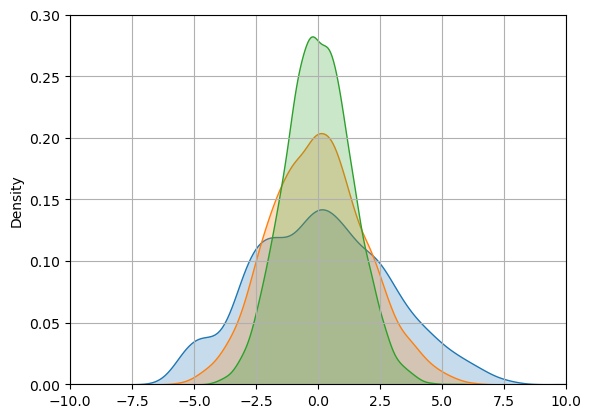

In [6]:
num_trials = 5000  # 试验次数

fig, ax = plt.subplots()  # 创建绘图

for num_draws in [4, 8, 16]:  # 不同抽样数
    mean_array = []  # 存储每次试验的均值
    
    for i in np.arange(num_trials):  # 进行每次试验
        indice_i = np.random.randint(low=0, high=num_population, size=(num_draws))  # 随机抽取样本索引
        sample_i = X[indice_i]  # 抽取样本数据
        mean_i = sample_i.mean()  # 计算样本均值
        mean_array.append(mean_i)  # 将样本均值加入列表

    sns.kdeplot(mean_array, fill=True)  # 绘制均值的核密度估计图

plt.xlim(-10, 10)  # 设置x轴范围
plt.ylim(0, 0.3)  # 设置y轴范围
plt.grid()  # 显示网格

## 计算标准误差（SE）并绘图

In [7]:
num_trials = 5000  # 试验次数

SE_array = []  # 存储每个抽样数量对应的标准误差

n_array = np.linspace(4, 100, 25)  # 不同的抽样数量

for num_draws in n_array:  # 遍历不同的抽样数量
    mean_array = []  # 存储每次试验的均值
    
    for i in np.arange(num_trials):  # 进行每次试验
        indice_i = np.random.randint(low=0, high=num_population, size=(int(num_draws)))  # 随机抽取样本索引
        sample_i = X[indice_i]  # 抽取样本数据
        mean_i = sample_i.mean()  # 计算样本均值
        mean_array.append(mean_i)  # 将样本均值加入列表

    mean_array = np.array(mean_array)  # 转换为数组便于计算
    SE_i = mean_array.std()  # 计算标准误差
    SE_array.append(SE_i)  # 存储当前抽样数量对应的标准误差

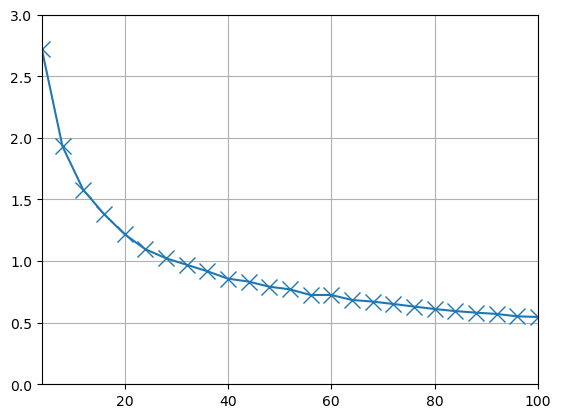

In [8]:
fig, ax = plt.subplots()  # 创建绘图

plt.plot(n_array, SE_array, marker='x', markersize=12)  # 绘制标准误差曲线
plt.xlim(4, 100)  # 设置x轴范围
plt.ylim(0, 3)  # 设置y轴范围
plt.grid()  # 显示网格